This is the file for Dataset 2, "Covertype."  We will be classifying the type of trees in the forest based on the other variables.

In [9]:
# Helpful Variables
mlp_filename = "./models/mlp.pkl"
mlp1_filename = "./models/mlp1.pkl"
mlp2_filename = "./models/mlp2.pkl"
mlp3_filename = "./models/mlp3.pkl"
mlp4_filename = "./models/mlp4.pkl"

lreg_filename = "./models/lreg.pkl"
lreg2_filename = "./models/lreg2.pkl"
lreg3_filename = "./models/lreg3.pkl"
lreg4_filename = "./models/lreg4.pkl"
lreg5_filename = "./models/lreg5.pkl"
lreg6_filename = "./models/lreg6.pkl"
lreg7_filename = "./models/lreg7.pkl"
lreg8_filename = "./models/lreg8.pkl"

In [2]:
import pandas as pd
import joblib
from pathlib import Path
from ucimlrepo import fetch_ucirepo 

# Load the Covertype dataset

covertype_features_filename = "./data/covertype_features.pkl"
covertype_targets_filename = "./data/covertype_targets.pkl"
path = Path(covertype_features_filename)

if not path.is_file():
    # download the dataset. It will take about a minute.
    print("Downloading dataset")
    covertype = fetch_ucirepo(id=31) 
    
    joblib.dump(covertype.data.features, covertype_features_filename)
    joblib.dump(covertype.data.targets, covertype_targets_filename)

# Load the covertype dataset
covertype_features = joblib.load(covertype_features_filename)
covertype_targets = joblib.load(covertype_targets_filename)

covertype_features.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [3]:

# First, let's inspect the data we have to work with
print(f"Features: {list(covertype_features.columns)}")
print(f"Target: {list(covertype_targets.columns)}")

# Have a variety of pieces of information about the 30x30 meter forest cells
print("Head of data:")

# And the number of entries
print(f"We have {covertype_features.shape[0]} entries for {covertype_features.shape[1]} features")



Features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
Target: ['Cover_Type']
Head of data:
We have 581012 entries for 54 features


In [4]:
# We also want to clean up our data so it is workable

# First, combine into same dataframe
df = covertype_features
df['Cover_Type'] = covertype_targets

# Note that there are no missing datapoints, so nothing needs to be dropped/fixed
print(f"Number of NaN Values: {df.isna().sum().sum()}")

# Also, all of the values are numeric so we don't need to fix that either

# Finally, separate into X and y
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

Number of NaN Values: 0


In [5]:
# Now, need to rescale
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to pandas dataframe
df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
df_scaled["Cover_Type"] = y
df_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,5


In [6]:
# Also, let's split the data into training and testing sets for ease of work
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# These next two blocks lets us validate the stratification worked

y_train.value_counts()

Cover_Type
2    226640
1    169472
3     28603
7     16408
6     13894
5      7594
4      2198
Name: count, dtype: int64

In [8]:
y_test.value_counts()

Cover_Type
2    56661
1    42368
3     7151
7     4102
6     3473
5     1899
4      549
Name: count, dtype: int64

## Data Analysis
Now, some exploratory data analysis to get a feel for the dataset

C:\Users\C25Dante.Cometto\AppData\Local\Temp\ipykernel_11784\3522432161.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


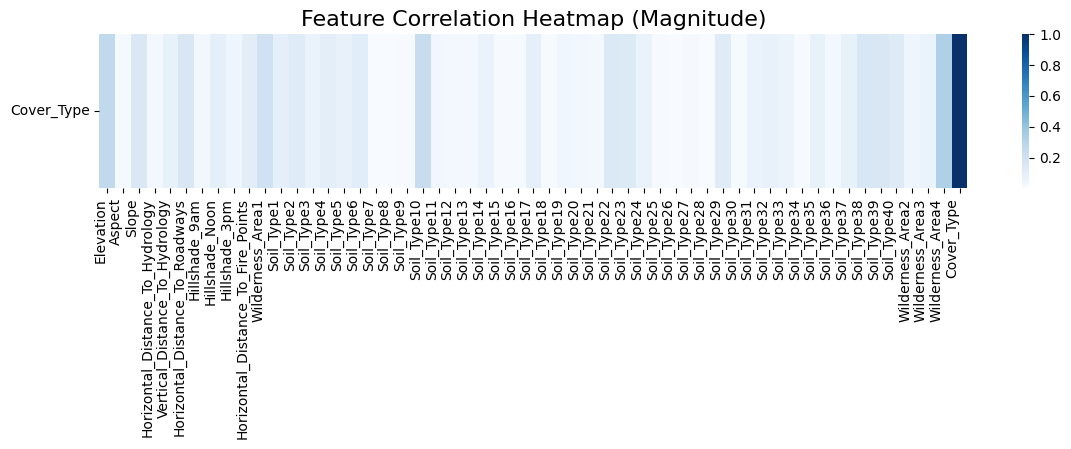

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute correlation matrix
correlation_matrix = df.corr()

#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create the heatmap
plt.figure(figsize=(14, 2))  # Adjust the figure size
sns.heatmap(correlation_matrix.tail(1).abs(), annot=False, fmt=".2f", cmap='Blues', cbar=True)

# Title and labels
plt.title("Feature Correlation Heatmap (Magnitude)", fontsize=16)
plt.xticks(rotation=90,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

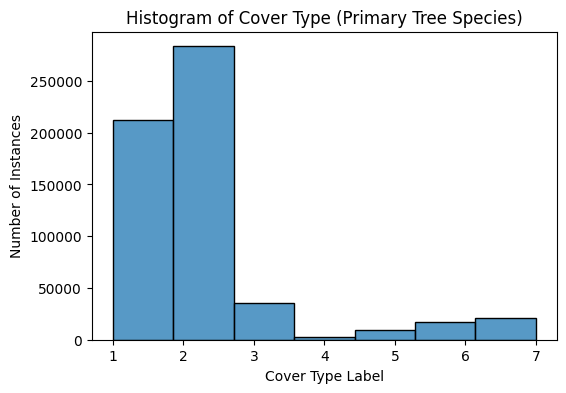

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 5, figsize=(15, 8))
# for i, ax in enumerate(axes.flatten()[2:10]):
#     ax.hist(df.iloc[:, i], bins=20, alpha=0.7)
#     ax.set_title(f'{df.columns[i+1]}')
# for i, ax in enumerate(axes.flatten()[-2:-1]):
#     ax.hist(df.iloc[:, i], bins=20, alpha=0.7)
#     ax.set_title(f'{df.columns[i+1]}')
# plt.tight_layout()
# plt.show()

# Assuming 'df' is your DataFrame containing the feature
feature_name = 'Cover_Type'  # Replace with the name of the feature you want to plot

plt.figure(figsize=(6, 4))
sns.histplot(df[feature_name], bins=7, kde=False)
plt.title(f'Histogram of Cover Type (Primary Tree Species)')
plt.xlabel("Cover Type Label")
plt.ylabel('Number of Instances')
plt.show()


c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

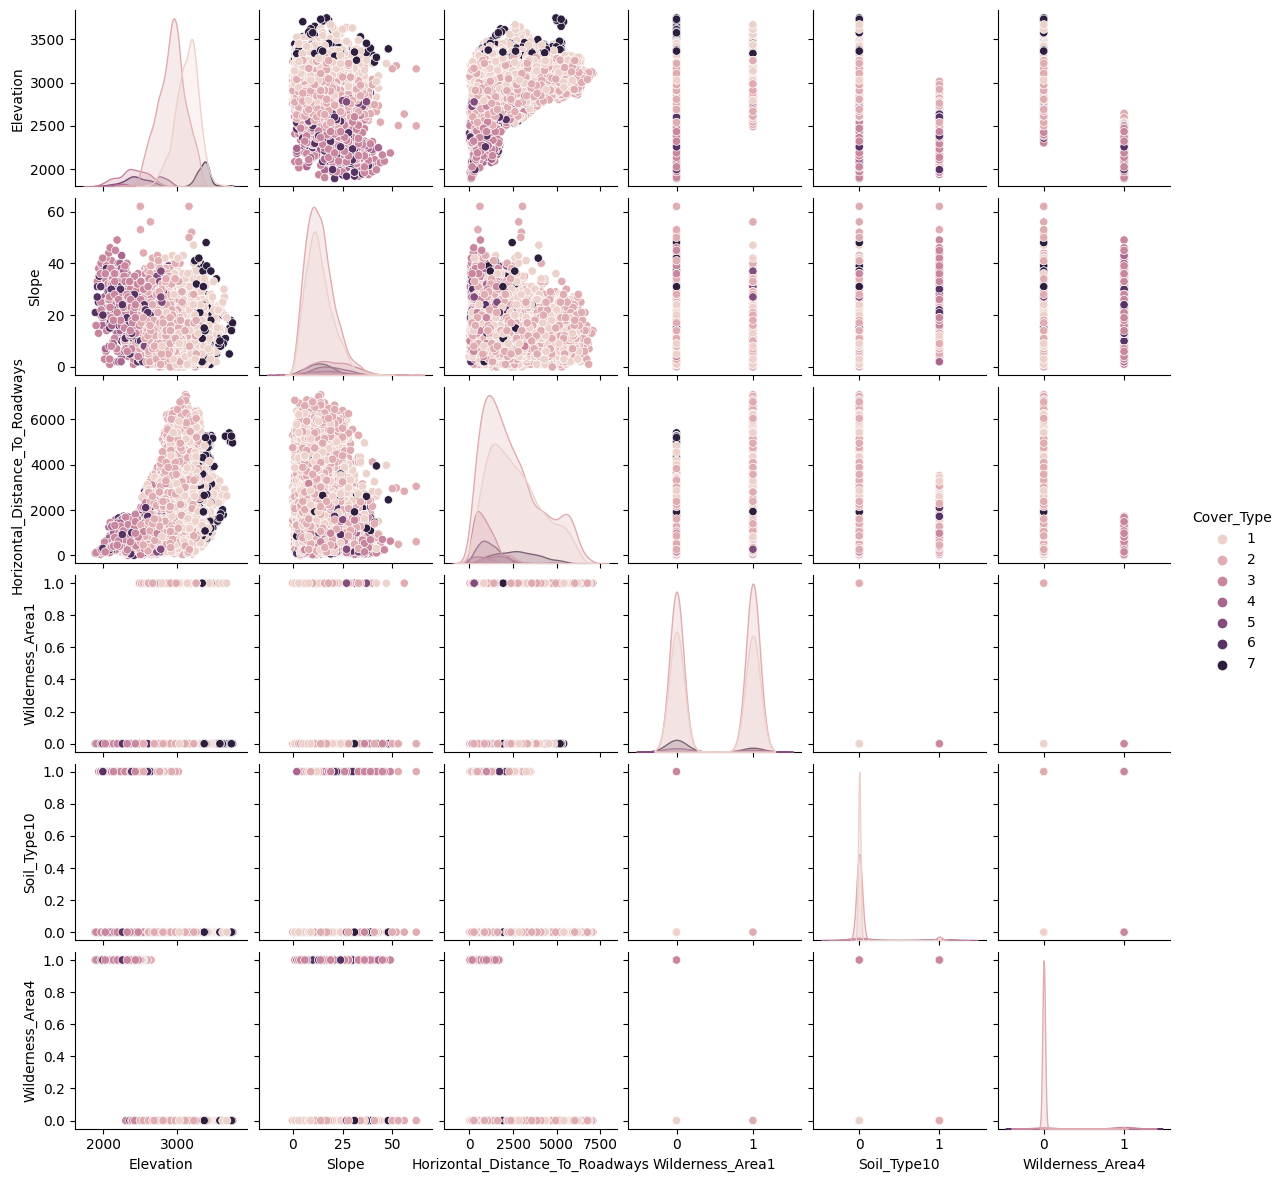

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

df_small = df.sample(10000,replace = False,random_state=42)
# we pick a color map to match that used by decision tree graphviz
palette = {"setosa": "orange", "versicolor": "green", "virginica": "purple"}

indices = [0, 2, 5, 10, 20, 53]
my_vars = [df.columns[i] for i in indices]

plt.figure(figsize=(8, 8))
g = sns.pairplot(df_small, vars=my_vars, hue="Cover_Type",height = 2)

for ax in g.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)

plt.show()

## Neural Network
Our task is to use classify the cover type (type of trees) based on the other features.  First, we will use a neural network.

In [ ]:
# First, we'll train a neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,2),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.1,
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp,mlp_filename)

Iteration 1, loss = 0.76879992
Iteration 2, loss = 0.65469220
Iteration 3, loss = 0.57819546
Iteration 4, loss = 0.55308935
Iteration 5, loss = 0.53735171
Iteration 6, loss = 0.52718581
Iteration 7, loss = 0.51830638
Iteration 8, loss = 0.51590515
Iteration 9, loss = 0.52249009
Iteration 10, loss = 0.51257706
Iteration 11, loss = 0.51705479
Iteration 12, loss = 0.50694554
Iteration 13, loss = 0.50701344
Iteration 14, loss = 0.50506036
Iteration 15, loss = 0.50177372
Iteration 16, loss = 0.50630216
Iteration 17, loss = 0.49744065
Iteration 18, loss = 0.49656242
Iteration 19, loss = 0.49648328
Iteration 20, loss = 0.49571176
Iteration 21, loss = 0.49476679
Iteration 22, loss = 0.49684588
Iteration 23, loss = 0.49190117
Iteration 24, loss = 0.49074462
Iteration 25, loss = 0.49276366
Iteration 26, loss = 0.48919211
Iteration 27, loss = 0.49174111
Iteration 28, loss = 0.49227421
Iteration 29, loss = 0.48935095
Iteration 30, loss = 0.48789111
Iteration 31, loss = 0.49336634
Iteration 32, los

['./models/mlp.pkl']

In [38]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp = joblib.load(mlp_filename)

# Evaluate the performance on the training set
y_pred_train = mlp.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 82.12
Testing Accuracy: 81.92
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.85      0.83     42368
           2       0.85      0.87      0.86     56661
           3       0.76      0.82      0.79      7151
           4       0.91      0.41      0.57       549
           5       0.55      0.01      0.03      1899
           6       0.42      0.48      0.45      3473
           7       0.97      0.60      0.74      4102

    accuracy                           0.82    116203
   macro avg       0.75      0.58      0.61    116203
weighted avg       0.82      0.82      0.81    116203



In [39]:
# Here we can validate that we are predicting every class
# Now we are also predicting tree type 5

import numpy as np
np.unique(y_pred, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([43817, 57895,  7746,   249,    49,  3928,  2519], dtype=int64))

The first model, `mlp`, got a training accuracy of 82.12% and a testing accuracy of 81.92%.  Took 2m26.7s to train, final loss was 0.49084766 on epoch 53

In [43]:
# Now we'll train a second neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp1 = MLPClassifier(
    hidden_layer_sizes=(100,4),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.1,
)

# Fit the model to the training data
mlp1.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp1,mlp1_filename)

Iteration 1, loss = 0.62477993
Iteration 2, loss = 0.55356734
Iteration 3, loss = 0.52915173
Iteration 4, loss = 0.50934460
Iteration 5, loss = 0.51092590
Iteration 6, loss = 0.52276864
Iteration 7, loss = 0.50501529
Iteration 8, loss = 0.49066571
Iteration 9, loss = 0.48311636
Iteration 10, loss = 0.47907881
Iteration 11, loss = 0.46687290
Iteration 12, loss = 0.48529709
Iteration 13, loss = 0.47400408
Iteration 14, loss = 0.47326908
Iteration 15, loss = 0.46358356
Iteration 16, loss = 0.45931743
Iteration 17, loss = 0.45598028
Iteration 18, loss = 0.45262431
Iteration 19, loss = 0.45131511
Iteration 20, loss = 0.44904543
Iteration 21, loss = 0.44726675
Iteration 22, loss = 0.45346570
Iteration 23, loss = 0.44890791
Iteration 24, loss = 0.44277065
Iteration 25, loss = 0.44296712
Iteration 26, loss = 0.44126564
Iteration 27, loss = 0.44160908
Iteration 28, loss = 0.44195431
Iteration 29, loss = 0.43761578
Iteration 30, loss = 0.44073169
Iteration 31, loss = 0.44069264
Iteration 32, los

['./models/mlp1.pkl']

In [40]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp1 = joblib.load(mlp1_filename)

# Evaluate the performance on the training set
y_pred_train = mlp1.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 80.49
Testing Accuracy: 80.27
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.85      0.81     42368
           2       0.83      0.86      0.85     56661
           3       0.73      0.81      0.77      7151
           4       0.70      0.63      0.66       549
           5       0.00      0.00      0.00      1899
           6       0.59      0.37      0.46      3473
           7       0.99      0.30      0.46      4102

    accuracy                           0.80    116203
   macro avg       0.66      0.55      0.57    116203
weighted avg       0.79      0.80      0.79    116203



c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

This model, `mlp1`, had a training accuracy of 80.49%, a testing accuracy of 80.27%, a final loss of 0.44042592 on epoch 50, and took 2m23.4s.  This is worse than `mlp`.  It took 2m 23.1s to train.

In [25]:
# Now we'll train a third neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp2 = MLPClassifier(
    hidden_layer_sizes=(25,25,25,25),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.05,
)

# Fit the model to the training data
mlp2.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp2,mlp2_filename)

Iteration 1, loss = 0.58257438
Iteration 2, loss = 0.48535005
Iteration 3, loss = 0.46439037
Iteration 4, loss = 0.44476241
Iteration 5, loss = 0.43047432
Iteration 6, loss = 0.42255746
Iteration 7, loss = 0.41434770
Iteration 8, loss = 0.41142993
Iteration 9, loss = 0.40641464
Iteration 10, loss = 0.40490730
Iteration 11, loss = 0.40029871
Iteration 12, loss = 0.39815808
Iteration 13, loss = 0.39464957
Iteration 14, loss = 0.39371239
Iteration 15, loss = 0.39447311
Iteration 16, loss = 0.38901029
Iteration 17, loss = 0.38823212
Iteration 18, loss = 0.38936820
Iteration 19, loss = 0.38882025
Iteration 20, loss = 0.38688025
Iteration 21, loss = 0.38522758
Iteration 22, loss = 0.38551558
Iteration 23, loss = 0.38598591
Iteration 24, loss = 0.38493778
Iteration 25, loss = 0.39017503
Iteration 26, loss = 0.38376372
Iteration 27, loss = 0.38418382
Iteration 28, loss = 0.38324560
Iteration 29, loss = 0.37954608
Iteration 30, loss = 0.38141979
Iteration 31, loss = 0.38747496
Iteration 32, los

['./models/mlp2.pkl']

In [41]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp2 = joblib.load(mlp2_filename)

# Evaluate the performance on the training set
y_pred_train = mlp2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 84.99
Testing Accuracy: 84.63
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.86      0.89      0.88     56661
           3       0.75      0.87      0.81      7151
           4       0.64      0.67      0.66       549
           5       0.72      0.44      0.55      1899
           6       0.65      0.52      0.58      3473
           7       0.92      0.76      0.83      4102

    accuracy                           0.85    116203
   macro avg       0.77      0.71      0.73    116203
weighted avg       0.85      0.85      0.84    116203



This model, `mlp2`, had a training accuracy of 84.99%, a testing accuracy of 84.63%, a final loss of 0.37746439 on epoch 69, and took 1m40.2s.  Learned how the shape actually works...

In [30]:
# Now we'll train a fourth neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp3 = MLPClassifier(
    hidden_layer_sizes=(100,100,25,25,25),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-3,
    learning_rate_init=0.05,
)

# Fit the model to the training data
mlp3.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp3,mlp3_filename)

Iteration 1, loss = 0.53373162
Iteration 2, loss = 0.41453588
Iteration 3, loss = 0.36622131
Iteration 4, loss = 0.33715955
Iteration 5, loss = 0.32317365
Iteration 6, loss = 0.30514928
Iteration 7, loss = 0.29391516
Iteration 8, loss = 0.28469076
Iteration 9, loss = 0.28099524
Iteration 10, loss = 0.27066117
Iteration 11, loss = 0.26761203
Iteration 12, loss = 0.25922884
Iteration 13, loss = 0.25700182
Iteration 14, loss = 0.25220525
Iteration 15, loss = 0.24845320
Iteration 16, loss = 0.24615869
Iteration 17, loss = 0.24135625
Iteration 18, loss = 0.23831370
Iteration 19, loss = 0.23614939
Iteration 20, loss = 0.23504337
Iteration 21, loss = 0.23199151
Iteration 22, loss = 0.23023058
Iteration 23, loss = 0.23021492
Iteration 24, loss = 0.22814173
Iteration 25, loss = 0.23277039
Iteration 26, loss = 0.23497191
Iteration 27, loss = 0.23043967
Iteration 28, loss = 0.22868130
Iteration 29, loss = 0.22794161
Iteration 30, loss = 0.23231374
Iteration 31, loss = 0.22151110
Iteration 32, los

['./models/mlp3.pkl']

In [11]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp3 = joblib.load(mlp3_filename)

# Evaluate the performance on the training set
y_pred_train = mlp3.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 92.56
Testing Accuracy: 91.86
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92     42368
           2       0.92      0.95      0.93     56661
           3       0.92      0.87      0.90      7151
           4       0.79      0.84      0.81       549
           5       0.86      0.66      0.74      1899
           6       0.79      0.87      0.83      3473
           7       0.96      0.86      0.91      4102

    accuracy                           0.92    116203
   macro avg       0.88      0.85      0.86    116203
weighted avg       0.92      0.92      0.92    116203



This model, `mlp3`, had a training accuracy of 92.56%, a testing accuracy of 91.86%, a final loss of 0.19713506 on epoch 82, and took 9m10.4s.  Weird instability at end led me to decreasing the tolerance so it stopped earlier

In [10]:
# Now we'll train a 5th neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp4 = MLPClassifier(
    hidden_layer_sizes=(100,100,25,25),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-3,
    learning_rate_init=0.01,
)

# Fit the model to the training data
mlp4.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp4,mlp4_filename)

Iteration 1, loss = 0.59576227
Iteration 2, loss = 0.46707063
Iteration 3, loss = 0.41667366
Iteration 4, loss = 0.38228068
Iteration 5, loss = 0.35657690
Iteration 6, loss = 0.33627881
Iteration 7, loss = 0.32141297
Iteration 8, loss = 0.30961550
Iteration 9, loss = 0.29926516
Iteration 10, loss = 0.28870002
Iteration 11, loss = 0.28020760
Iteration 12, loss = 0.27302969
Iteration 13, loss = 0.26966169
Iteration 14, loss = 0.26160274
Iteration 15, loss = 0.25562090
Iteration 16, loss = 0.25102324
Iteration 17, loss = 0.24688214
Iteration 18, loss = 0.24363071
Iteration 19, loss = 0.23780337
Iteration 20, loss = 0.23620774
Iteration 21, loss = 0.23479151
Iteration 22, loss = 0.23080996
Iteration 23, loss = 0.22612004
Iteration 24, loss = 0.22309935
Iteration 25, loss = 0.22056722
Iteration 26, loss = 0.21920923
Iteration 27, loss = 0.21628224
Iteration 28, loss = 0.21389445
Iteration 29, loss = 0.21391774
Iteration 30, loss = 0.20995709
Iteration 31, loss = 0.20905005
Iteration 32, los

['./models/mlp4.pkl']

In [11]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp4 = joblib.load(mlp4_filename)

# Evaluate the performance on the training set
y_pred_train = mlp4.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 93.19
Testing Accuracy: 92.28
Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.94      0.92     42368
           2       0.94      0.93      0.94     56661
           3       0.92      0.91      0.92      7151
           4       0.86      0.76      0.81       549
           5       0.82      0.79      0.80      1899
           6       0.84      0.88      0.86      3473
           7       0.98      0.77      0.86      4102

    accuracy                           0.92    116203
   macro avg       0.90      0.85      0.87    116203
weighted avg       0.92      0.92      0.92    116203



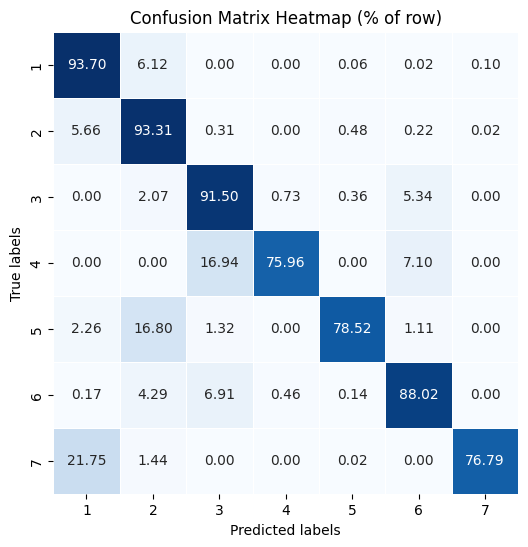

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
# y_test: true labels
# y_pred: predicted labels from the model

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
row_sums = cm.sum(axis=1, keepdims=True)
cm_scaled = cm / row_sums * 100

classes = list(range(1,8))

# Create a heatmap from the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_scaled, annot=True, fmt='.2f', cmap='Blues', linewidths=.5, cbar=False,xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap (% of row)')
plt.show() 

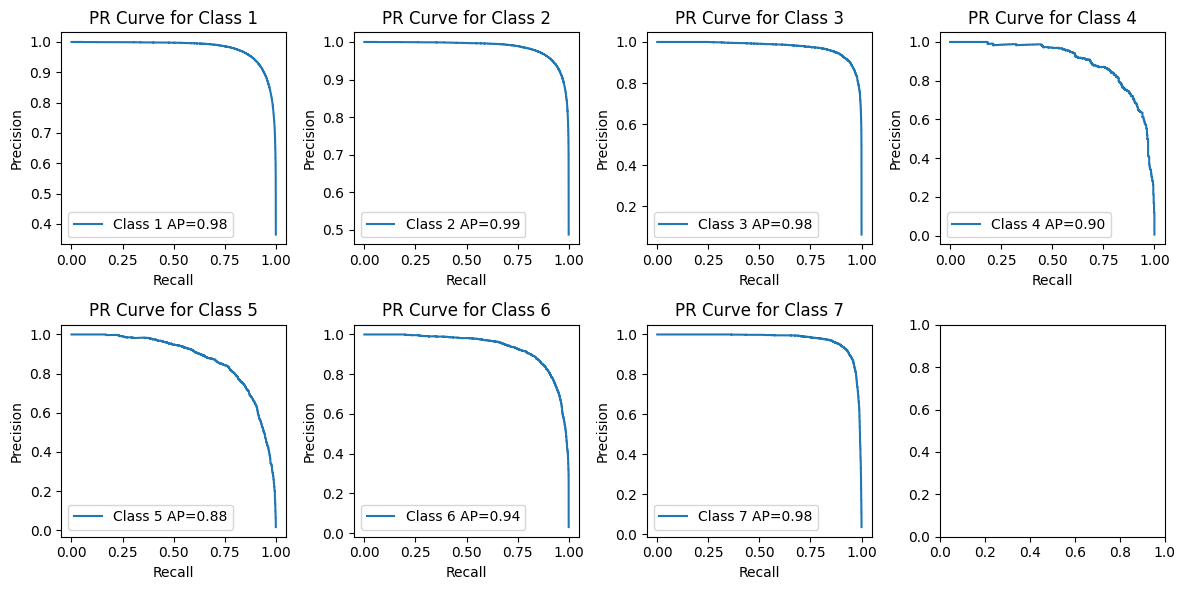

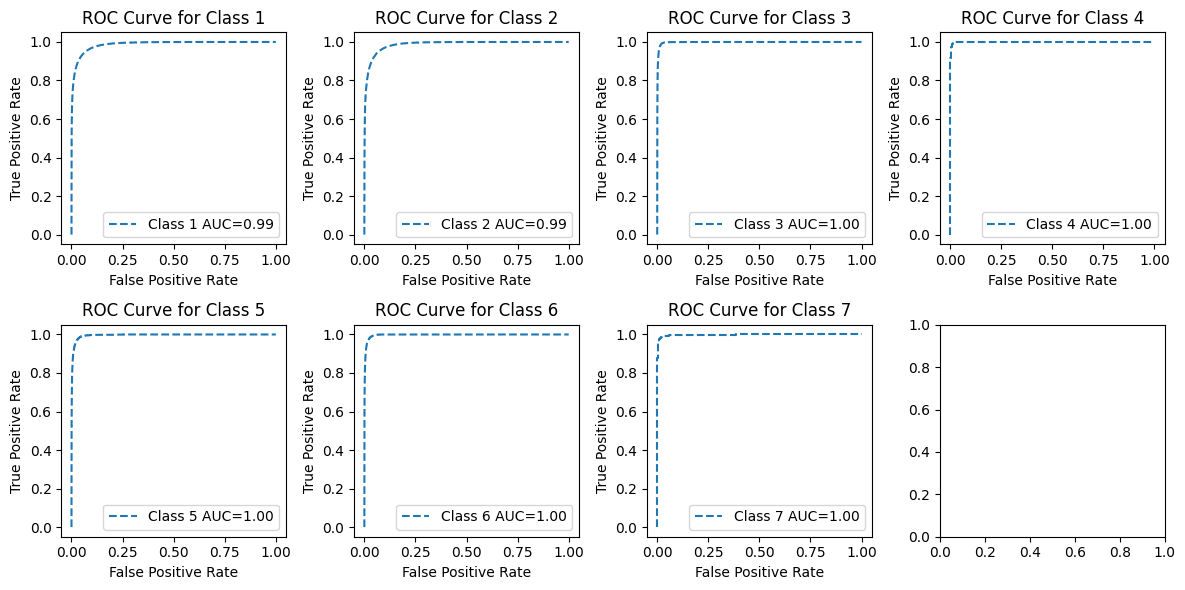

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# PR Curve

y_pred_proba = mlp4.predict_proba(X_test)
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_pred_proba.shape[1]


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes = axes.ravel()
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binary[:, i], y_pred_proba[:, i])
    average_precision = average_precision_score(y_test_binary[:, i], y_pred_proba[:, i])
    
    # Plot each precision-recall curve on its own subplot
    ax = axes[i]
    ax.step(recall, precision, where='post', label=f'Class {i+1} AP={average_precision:.2f}')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'PR Curve for Class {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()

# ROC Curve

y_pred_proba = mlp4.predict_proba(X_test)
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_pred_proba.shape[1]


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes = axes.ravel()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
    auc_score = roc_auc_score(y_test_binary[:, i], y_pred_proba[:, i])
    
    # Plot each ROC curve on its own subplot
    ax = axes[i]
    ax.plot(fpr, tpr, linestyle='--', label=f'Class {i+1} AUC={auc_score:.2f}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for Class {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()

now, do 5 fold cv to validate

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

mlp4 = joblib.load(mlp4_filename)

# Create an MLPClassifier and a pipeline with StandardScaler
pipeline = make_pipeline(StandardScaler(), mlp4)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_scaled, y, cv=4, scoring='accuracy')

print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation: {np.std(cv_scores):.2f}")

Iteration 1, loss = 0.53509892
Iteration 2, loss = 0.38363298
Iteration 3, loss = 0.33317686
Iteration 4, loss = 0.30146591
Iteration 5, loss = 0.27896168
Iteration 6, loss = 0.26151733
Iteration 7, loss = 0.24799830
Iteration 8, loss = 0.23481989
Iteration 9, loss = 0.22485222
Iteration 10, loss = 0.21632555
Iteration 11, loss = 0.20921147
Iteration 12, loss = 0.20234293
Iteration 13, loss = 0.19737761
Iteration 14, loss = 0.19308916
Iteration 15, loss = 0.18844431
Iteration 16, loss = 0.18445295
Iteration 17, loss = 0.18101722
Iteration 18, loss = 0.17760904
Iteration 19, loss = 0.17466730
Iteration 20, loss = 0.17107410
Iteration 21, loss = 0.16881908
Iteration 22, loss = 0.16661623
Iteration 23, loss = 0.16462422
Iteration 24, loss = 0.16236361
Iteration 25, loss = 0.16039480
Iteration 26, loss = 0.15902286
Iteration 27, loss = 0.15683366
Iteration 28, loss = 0.15561665
Iteration 29, loss = 0.15369140
Iteration 30, loss = 0.15274380
Iteration 31, loss = 0.15093030
Iteration 32, los

In [15]:
print(cv_scores)

[0.55622948 0.52160713 0.52999938 0.62262397]


ETA: 45 minutes is 2245

Note: first good model fell apart because the learning rate was too high

In [ ]:
import shap

K=3
X_sample = shap.sample(X_train, K)

explainer = shap.KernelExplainer(mlp.predict, X_sample)
shap_values = explainer.shap_values(X_sample, nsamples=100) 

shap.summary_plot(shap_values, X_train, max_display= 5, plot_type = "bar")

# Logistic Regression

Now, we will use logistic regression

In [ ]:
# Model 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg = LogisticRegression(penalty='None', 
                          dual=False, 
                          tol=0.0001, 
                          C=1.0, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg.coef_)
print("Intercept:", lreg.intercept_)

# Save the model to a file
joblib.dump(lreg,lreg_filename)

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


max_iter reached after 114 seconds
Coefficients: [[ 1.92630155e+00 -1.48899529e-01 -4.21799355e-04 -1.00299430e-01
  -1.35700739e-01  4.94104814e-02 -1.47012605e-01 -2.25722334e-01
   2.13839185e-01  6.09805325e-02  4.46506077e-01 -2.30982816e-01
  -4.40210706e-01 -3.29859716e-01 -2.60901917e-01 -1.65919063e-01
  -3.45746242e-01 -5.83181832e-02  9.97652902e-03  1.21156134e-01
   8.63535917e-03 -1.66101083e-02  1.14646139e-01 -1.66437524e-02
  -1.06885410e-01 -6.81375188e-03  1.35901068e-02 -6.13997983e-02
   9.55757752e-03  4.37503833e-02  1.42928704e-01  7.61244563e-02
   2.67927175e-01  1.77831319e-01  1.41887123e-01  5.44235471e-03
   2.15798014e-02  4.16109947e-02  2.37407313e-02 -6.38459935e-02
  -7.63908743e-02  1.44280367e-01  5.82312467e-03  1.49282416e-01
  -7.56906243e-02 -1.01791839e-02 -2.60848553e-02 -1.19063184e-01
  -9.43949664e-02 -4.58781299e-02 -8.94913943e-02  5.68609027e-02
  -5.74925898e-02 -8.44500189e-01]
 [-2.27432003e-01 -1.32790126e-01  1.58389650e-01  2.74346

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['./models/lreg.pkl']

In [86]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg = joblib.load(lreg_filename)

# Evaluate the performance on the training set
y_pred_train = lreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# For a ROC... multiclass is more complicated
# Several methods, choosing Micro-Averaged for best overall summary
# probs = lreg.predict_proba(X_test)


# # Binarize the true labels
# classes = np.unique(y_test)
# y_true_binarized = label_binarize(y_test, classes=classes)

# # Compute micro-average ROC
# fpr, tpr, thresholds = roc_curve(y_true_binarized.ravel(), probs.ravel())
# roc_auc = auc(fpr, tpr)

# # Plot the micro-averaged ROC curve
# plt.figure()
# plt.plot(fpr, tpr, label=f"Micro-Averaged ROC Curve (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line

# Select meaningful indices to annotate
# key_indices = [0, len(fpr) // 3, len(fpr) // 2, len(fpr) *2 // 3, len(fpr) *5 // 6, len(fpr) - 1]

# for i in key_indices:
#     plt.annotate(f'Thresh={thresholds[i]:.2f}',
#                  xy=(fpr[i], tpr[i]),
#                  xytext=(fpr[i] + 0.1, tpr[i] - 0.1),  # Offset to avoid overlap
#                  arrowprops=dict(arrowstyle="->", color='black'),
#                  fontsize=10)

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Micro-Averaged ROC Curve")
# plt.legend(loc="lower right")
# plt.show()


# Then, can choose a different threshold -- it doesn't use thresholds
# threshold = 0.18
# y_pred2 = (probs >= threshold).astype(int)

# # confusion matrix
# confusion = confusion_matrix(y_test, y_pred2)

# # classification report
# classification_rep = classification_report(y_test, y_pred2)

# print("Confusion Matrix:\n", confusion)
# print("Classification Report:\n", classification_rep)

Training Accuracy: 71.93
Testing Accuracy: 71.86
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.64      0.84      0.73      7151
           4       0.47      0.26      0.34       549
           5       0.12      0.01      0.01      1899
           6       0.48      0.17      0.26      3473
           7       0.70      0.53      0.60      4102

    accuracy                           0.72    116203
   macro avg       0.55      0.47      0.49    116203
weighted avg       0.70      0.72      0.71    116203



This first lreg took 100 iterations in 1m54s, giving a train accuracy of 71.93 and test accuracy of 71.86

In [89]:
# Model 2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg2 = LogisticRegression(penalty='none', 
                          dual=False, 
                          tol=0.01, 
                          C=1.0, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg2.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg2.coef_)
print("Intercept:", lreg2.intercept_)

# Save the model to a file
joblib.dump(lreg2,lreg2_filename)

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


convergence after 63 epochs took 69 seconds
Coefficients: [[ 1.77122375e+00 -1.38559806e-01 -2.11665298e-02 -7.42387531e-02
  -1.33056231e-01  7.61950937e-02 -1.61218411e-01 -2.00015738e-01
   1.79269525e-01  6.33012533e-02  4.10531925e-01 -2.12376586e-01
  -4.04193905e-01 -3.03412724e-01 -2.61773372e-01 -1.52429196e-01
  -3.18196406e-01 -5.36214468e-02  8.91249261e-03  1.07634103e-01
  -2.59381011e-02 -3.41060147e-02  7.89937979e-02 -1.83994700e-02
  -9.85527386e-02 -6.23000243e-03  6.92425279e-03 -6.42253116e-02
  -5.83159313e-03  4.39079262e-02  1.31981743e-01  7.31733261e-02
   2.57793709e-01  1.79398831e-01  1.47019568e-01  4.47882467e-03
   1.42151453e-02  4.06470239e-02  1.70515634e-02 -4.63755704e-02
  -7.00754980e-02  1.44413339e-01  2.86902292e-02  1.49057945e-01
  -7.71737657e-02 -7.98073573e-03 -2.64852541e-02 -1.12128770e-01
  -9.84218207e-02 -5.24252753e-02 -9.77308398e-02  4.85894531e-02
  -5.16663976e-02 -7.75546983e-01]
 [-3.37369326e-01 -1.24506173e-01  1.48826655e-01

['./models/lreg2.pkl']

In [90]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg2 = joblib.load(lreg2_filename)

# Evaluate the performance on the training set
y_pred_train = lreg2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 71.73
Testing Accuracy: 71.62
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.63      0.85      0.72      7151
           4       0.45      0.23      0.31       549
           5       0.13      0.01      0.01      1899
           6       0.47      0.14      0.22      3473
           7       0.68      0.53      0.59      4102

    accuracy                           0.72    116203
   macro avg       0.54      0.46      0.47    116203
weighted avg       0.70      0.72      0.70    116203



1m9.5s, 63 epochs, 71.73, 71.62

In [92]:
# Model 3
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg3 = LogisticRegression(penalty='l1', 
                          dual=False, 
                          tol=0.01, 
                          C=1.0, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg3.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg3.coef_)
print("Intercept:", lreg3.intercept_)

# Save the model to a file
joblib.dump(lreg3,lreg3_filename)

convergence after 63 epochs took 107 seconds
Coefficients: [[ 1.77148300e+00 -1.38338286e-01 -2.12179951e-02 -7.40403309e-02
  -1.32934104e-01  7.60169122e-02 -1.61253573e-01 -1.99948892e-01
   1.79037439e-01  6.32179828e-02  4.10388428e-01 -2.11725649e-01
  -4.03662013e-01 -3.02820451e-01 -2.61745007e-01 -1.51778795e-01
  -3.17549732e-01 -5.31454232e-02  8.58706013e-03  1.07494216e-01
  -2.57950480e-02 -3.42961554e-02  7.88386430e-02 -1.85435400e-02
  -9.79180111e-02 -5.57976359e-03  6.79661561e-03 -6.43720589e-02
  -5.61708259e-03  4.38953557e-02  1.31755587e-01  7.30616100e-02
   2.57625988e-01  1.79352124e-01  1.46981550e-01  4.17819081e-03
   1.40113749e-02  4.03884307e-02  1.68036224e-02 -4.64842408e-02
  -6.99026464e-02  1.44218558e-01  2.86279855e-02  1.48918348e-01
  -7.74318447e-02 -7.93390241e-03 -2.65807197e-02 -1.11677239e-01
  -9.82812025e-02 -5.22633052e-02 -9.75998150e-02  4.84014171e-02
  -5.17147130e-02 -7.74910722e-01]
 [-3.36972668e-01 -1.24299502e-01  1.48712841e-0

['./models/lreg3.pkl']

In [93]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg3 = joblib.load(lreg3_filename)

# Evaluate the performance on the training set
y_pred_train = lreg3.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 71.73
Testing Accuracy: 71.62
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.63      0.85      0.72      7151
           4       0.45      0.23      0.31       549
           5       0.13      0.01      0.01      1899
           6       0.47      0.14      0.22      3473
           7       0.68      0.53      0.59      4102

    accuracy                           0.72    116203
   macro avg       0.54      0.46      0.47    116203
weighted avg       0.70      0.72      0.70    116203



1m47.3, 63epochs, 71.73, 71.62

In [94]:
# Model 4
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg4 = LogisticRegression(penalty='l1', 
                          dual=False, 
                          tol=0.01, 
                          C=0.001, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg4.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg4.coef_)
print("Intercept:", lreg4.intercept_)

# Save the model to a file
joblib.dump(lreg4,lreg4_filename)

convergence after 59 epochs took 92 seconds
Coefficients: [[ 1.98847158e+00 -4.95919628e-03 -7.67973552e-02  0.00000000e+00
  -6.12933938e-02  0.00000000e+00 -1.73050000e-01 -1.38455961e-01
   0.00000000e+00  3.09234363e-03  3.46260535e-01  0.00000000e+00
  -1.02047040e-01  0.00000000e+00 -1.60399183e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.03018445e-02
   0.00000000e+00 -9.47231059e-03  0.00000000e+00 -5.99706598e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.93133519e-02
   0.00000000e+00  3.74249183e-02  9.78851944e-02  5.48671361e-02
   2.33915061e-01  1.54251155e-01  5.42810279e-02  0.00000000e+00
  -7.35999315e-03  8.11970352e-03  0.00000000e+00 -6.52763494e-03
  -3.10985027e-02  5.79860452e-02  0.00000000e+00  5.08793688e-02
  -7.32025207e-02  0.00000000e+00 -1.40987601e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.04633165e-02 -2.30047200e-01]
 [ 0.00000000e+00  0.00000000e+00  6.05690603e-02

['./models/lreg4.pkl']

In [96]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg4 = joblib.load(lreg4_filename)

# Evaluate the performance on the training set
y_pred_train = lreg4.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 71.83
Testing Accuracy: 71.65
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.63      0.87      0.73      7151
           4       0.36      0.05      0.08       549
           5       0.00      0.00      0.00      1899
           6       0.42      0.06      0.11      3473
           7       0.67      0.50      0.58      4102

    accuracy                           0.72    116203
   macro avg       0.51      0.43      0.42    116203
weighted avg       0.70      0.72      0.70    116203



59epoch 1m32.2s, 71.83, 71.65

In [97]:
# Model 5
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg5 = LogisticRegression(penalty='l1', 
                          dual=False, 
                          tol=0.01, 
                          C=0.001, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight="balanced",
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg5.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg5.coef_)
print("Intercept:", lreg5.intercept_)

# Save the model to a file
joblib.dump(lreg5,lreg5_filename)

convergence after 46 epochs took 70 seconds
Coefficients: [[ 1.77722648e+00 -7.33630218e-03 -1.04080434e-01  3.25225241e-02
  -1.03254930e-02  0.00000000e+00 -2.06130724e-01 -1.22120729e-01
   0.00000000e+00  0.00000000e+00  3.12257695e-01  0.00000000e+00
  -4.18354518e-02  0.00000000e+00 -2.06392287e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.79228862e-02  0.00000000e+00 -3.34288562e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.14187585e-01
   0.00000000e+00  3.80216216e-02  9.40777556e-02  4.76893873e-02
   2.56454234e-01  9.60004286e-02  6.59307299e-02  0.00000000e+00
   0.00000000e+00  3.82835006e-03  0.00000000e+00 -3.49423805e-02
  -2.86430098e-02  6.49165275e-02  0.00000000e+00  4.12974825e-02
  -6.21582971e-02  0.00000000e+00 -1.36197725e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.22156662e-01 -2.07536775e-01]
 [ 9.89324334e-02 -1.48229104e-02  0.00000000e+00

['./models/lreg5.pkl']

In [104]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg5 = joblib.load(lreg5_filename)

# Evaluate the performance on the training set
y_pred_train = lreg5.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 58.61
Testing Accuracy: 58.62
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.67      0.67     42368
           2       0.80      0.50      0.62     56661
           3       0.64      0.52      0.57      7151
           4       0.23      0.86      0.36       549
           5       0.09      0.71      0.16      1899
           6       0.31      0.60      0.41      3473
           7       0.41      0.87      0.55      4102

    accuracy                           0.59    116203
   macro avg       0.45      0.68      0.48    116203
weighted avg       0.70      0.59      0.62    116203



1m10.2, 46epochs, 71.83, 71.65

In [100]:
# Model 6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg6 = LogisticRegression(penalty='l2', 
                          dual=False, 
                          tol=0.01, 
                          C=0.001, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight="balanced",
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg6.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg6.coef_)
print("Intercept:", lreg6.intercept_)

# Save the model to a file
joblib.dump(lreg6,lreg6_filename)

convergence after 39 epochs took 43 seconds
Coefficients: [[ 1.42306042e+00 -1.10967697e-01 -9.79978869e-02  1.31792005e-01
  -9.50346518e-02  5.82124231e-02 -1.93495478e-01 -1.63653732e-01
   1.40024930e-01  7.29788740e-02  3.04369669e-01 -1.22729115e-01
  -2.60771207e-01 -1.76877610e-01 -3.02171533e-01 -8.38838926e-02
  -1.83949530e-01 -2.87122470e-02  9.68015150e-03  8.43885664e-02
  -1.87416940e-01 -1.14040807e-01  6.48948972e-02 -5.12497499e-02
  -6.21936172e-02 -2.94648339e-03  5.58744008e-03 -1.15478966e-01
  -3.85290588e-02  5.83683065e-02  1.35491536e-01  8.09996009e-02
   2.92918963e-01  1.62751562e-01  1.11064554e-01  1.30266963e-02
  -2.91449409e-03  4.10743064e-02 -3.03588072e-03 -2.25651411e-02
  -3.60460632e-02  1.17083002e-01 -1.37721540e-02  1.19644701e-01
  -1.02606634e-01  7.53970512e-03 -2.57517168e-02 -6.36952489e-02
  -3.75186310e-02  1.58987847e-02 -3.38281215e-02  4.80356553e-02
  -1.03926002e-01 -4.52545565e-01]
 [-8.12290852e-02 -1.32017456e-01  7.33133470e-02

['./models/lreg6.pkl']

In [105]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg6 = joblib.load(lreg6_filename)

# Evaluate the performance on the training set
y_pred_train = lreg6.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg6.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 58.38
Testing Accuracy: 58.45
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.67      0.67     42368
           2       0.79      0.50      0.62     56661
           3       0.63      0.53      0.58      7151
           4       0.23      0.87      0.37       549
           5       0.09      0.71      0.16      1899
           6       0.30      0.61      0.40      3473
           7       0.41      0.86      0.55      4102

    accuracy                           0.58    116203
   macro avg       0.45      0.68      0.48    116203
weighted avg       0.70      0.58      0.62    116203



43.2, 39 epochs, 71.83, 71.65

In [111]:
# Model 7
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg7 = LogisticRegression(penalty='l2', 
                          dual=False, 
                          tol=0.00001, 
                          C=0.001, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=200, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg7.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg7.coef_)
print("Intercept:", lreg7.intercept_)

# Save the model to a file
joblib.dump(lreg7,lreg7_filename)

max_iter reached after 222 seconds
Coefficients: [[ 1.71434283e+00 -1.24119431e-01 -3.55651945e-02 -6.15869354e-02
  -1.19232436e-01  8.85820905e-02 -1.45572579e-01 -2.00713285e-01
   1.82817569e-01  6.40188836e-02  3.17861764e-01 -5.11500091e-02
  -2.32931230e-01 -1.49395181e-01 -2.53984134e-01 -3.79793009e-02
  -1.09623546e-01 -3.00458588e-02  8.15072786e-03  9.31570414e-02
  -8.45125944e-02 -7.13130283e-02  7.68327389e-02 -5.30713994e-02
  -3.01352493e-02 -1.41420299e-03 -1.24269018e-02 -8.43117130e-02
  -7.98674711e-03  3.92022253e-02  1.04370465e-01  7.42719751e-02
   2.51247133e-01  1.56110087e-01  1.21269866e-01  4.11293874e-03
   3.45265387e-03  3.52549092e-02  1.46947619e-02 -5.99905514e-02
  -1.05177113e-01  1.25055338e-01  1.82935966e-03  1.16851836e-01
  -7.54216349e-02 -1.68680843e-02 -2.56883552e-02 -8.45096848e-02
  -9.11710054e-02 -4.72133759e-02 -8.30252821e-02  1.73069612e-02
  -1.96121886e-01 -2.64922543e-01]
 [-2.88707475e-01 -1.10613764e-01  1.18279933e-01  2.83410

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['./models/lreg7.pkl']

In [112]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg7 = joblib.load(lreg7_filename)

# Evaluate the performance on the training set
y_pred_train = lreg7.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 71.84
Testing Accuracy: 71.71
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.63      0.85      0.73      7151
           4       0.48      0.21      0.29       549
           5       0.11      0.00      0.01      1899
           6       0.47      0.14      0.21      3473
           7       0.69      0.53      0.60      4102

    accuracy                           0.72    116203
   macro avg       0.55      0.46      0.47    116203
weighted avg       0.70      0.72      0.70    116203



3m 42.7s, 200

In [113]:
# Model 8
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg8 = LogisticRegression(penalty='l2', 
                          dual=False, 
                          tol=0.00001, 
                          C=10, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=200, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg8.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg8.coef_)
print("Intercept:", lreg8.intercept_)

# Save the model to a file
joblib.dump(lreg8,lreg8_filename)

max_iter reached after 220 seconds
Coefficients: [[ 2.20221081e+00 -1.59644489e-01  2.07833738e-02 -1.51817734e-01
  -1.35843943e-01 -3.23754026e-02 -1.14789153e-01 -2.86544501e-01
   2.83662029e-01  4.12606531e-02  5.09601551e-01 -2.61771980e-01
  -4.97868502e-01 -3.72210640e-01 -2.69296782e-01 -1.88241293e-01
  -3.91280570e-01 -6.58569178e-02  1.20225010e-02  1.40288869e-01
   4.73715156e-02  8.49525385e-03  1.68424113e-01 -1.90355399e-02
  -1.20601304e-01 -7.77991010e-03  2.54924921e-02 -5.72262873e-02
   3.30488812e-02  4.18823927e-02  1.58264511e-01  8.06372453e-02
   2.84442304e-01  1.75247689e-01  1.32120514e-01  6.81223979e-03
   3.19675910e-02  4.24811913e-02  3.18758946e-02 -7.18900119e-02
  -7.62910115e-02  1.44780669e-01 -3.45895289e-02  1.52653726e-01
  -7.32457632e-02 -1.44705916e-02 -2.56927226e-02 -1.29595744e-01
  -9.25989306e-02 -3.77045053e-02 -7.94484826e-02  6.49071689e-02
  -6.83847444e-02 -9.58222760e-01]
 [-2.26173467e-02 -1.41343400e-01  1.59649574e-01  2.36601

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['./models/lreg8.pkl']

In [114]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import joblib

lreg8 = joblib.load(lreg8_filename)

# Evaluate the performance on the training set
y_pred_train = lreg8.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = lreg8.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 72.18
Testing Accuracy: 72.06
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.65      0.83      0.73      7151
           4       0.48      0.29      0.36       549
           5       0.11      0.00      0.01      1899
           6       0.49      0.21      0.29      3473
           7       0.72      0.54      0.62      4102

    accuracy                           0.72    116203
   macro avg       0.56      0.48      0.50    116203
weighted avg       0.71      0.72      0.71    116203



See spreadsheet

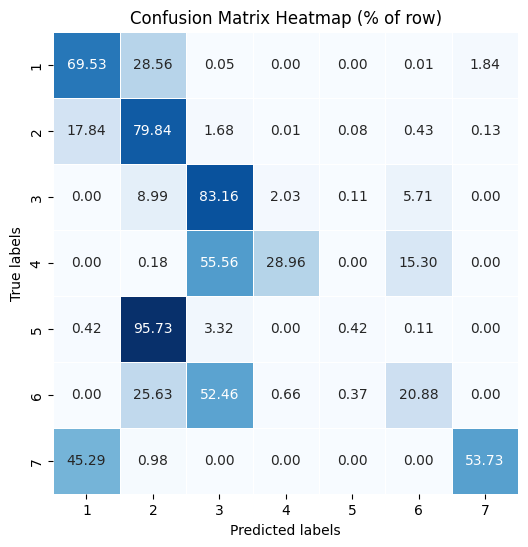

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
# y_test: true labels
# y_pred: predicted labels from the model

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
row_sums = cm.sum(axis=1, keepdims=True)
cm_scaled = cm / row_sums * 100

classes = list(range(1,8))

# Create a heatmap from the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_scaled, annot=True, fmt='.2f', cmap='Blues', linewidths=.5, cbar=False,xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap (% of row)')
plt.show() 

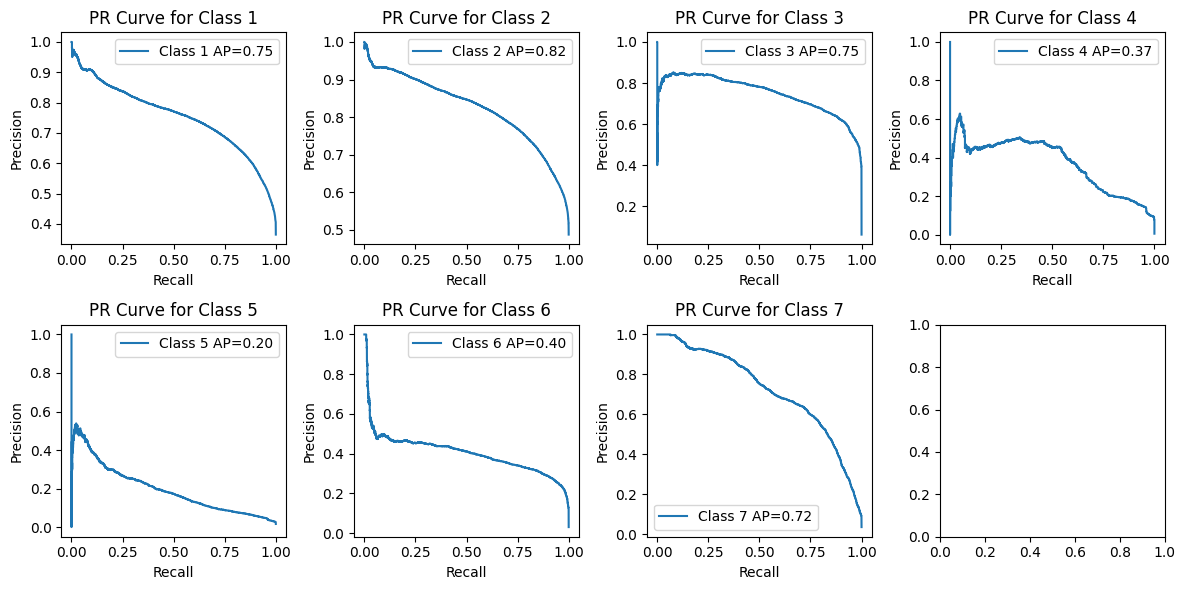

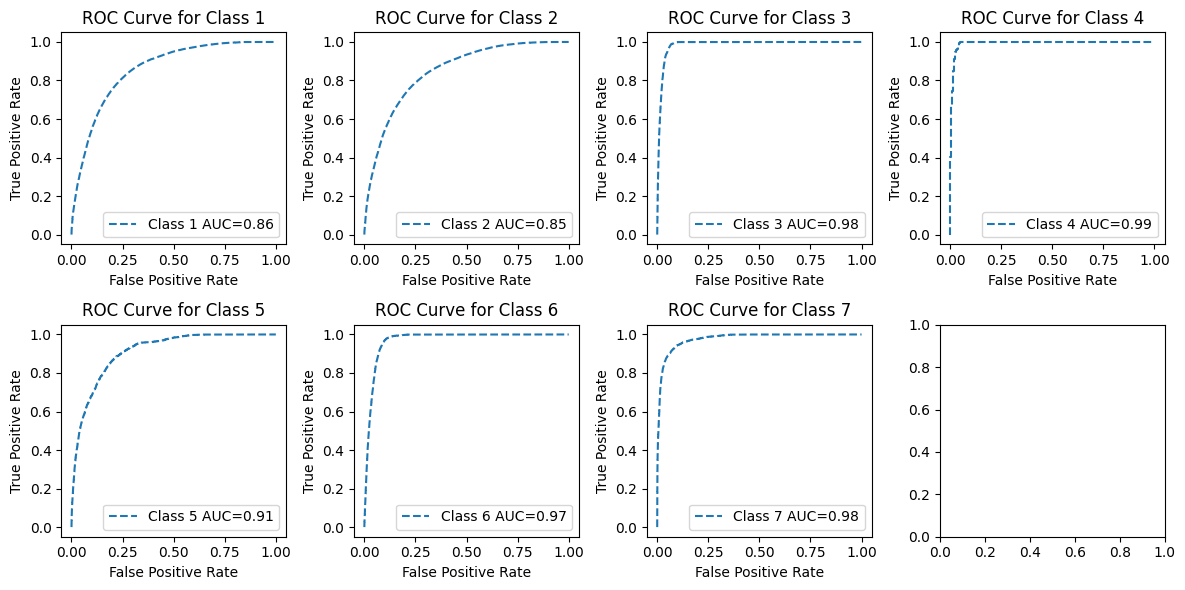

In [116]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# PR Curve

y_pred_proba = lreg8.predict_proba(X_test)
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_pred_proba.shape[1]


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes = axes.ravel()
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binary[:, i], y_pred_proba[:, i])
    average_precision = average_precision_score(y_test_binary[:, i], y_pred_proba[:, i])
    
    # Plot each precision-recall curve on its own subplot
    ax = axes[i]
    ax.step(recall, precision, where='post', label=f'Class {i+1} AP={average_precision:.2f}')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'PR Curve for Class {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()

# ROC Curve

y_pred_proba = lreg8.predict_proba(X_test)
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_pred_proba.shape[1]


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes = axes.ravel()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
    auc_score = roc_auc_score(y_test_binary[:, i], y_pred_proba[:, i])
    
    # Plot each ROC curve on its own subplot
    ax = axes[i]
    ax.plot(fpr, tpr, linestyle='--', label=f'Class {i+1} AUC={auc_score:.2f}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for Class {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

lreg8 = joblib.load(lreg8_filename)

# Create an MLPClassifier and a pipeline with StandardScaler
#pipeline = make_pipeline(StandardScaler(), lreg8)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lreg8, X_scaled, y, cv=5, scoring='accuracy')

print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation: {np.std(cv_scores):.2f}")

max_iter reached after 231 seconds


c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 222 seconds


c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 227 seconds


c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 228 seconds


c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 222 seconds
Mean accuracy: 0.65
Standard deviation: 0.08


c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

lreg8 = joblib.load(lreg8_filename)

coefficients = lreg8.coef_.flatten()

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': df.columns[0:-1],  # Feature names
    'Coefficient': coefficients  # Coefficients as importance
})

# Sort the DataFrame by the absolute value of coefficients (larger absolute values indicate more importance)
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

top_10 = feature_importance_df.head(10)

# Plot the feature coefficients (importance)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance based on SGDRegressor Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

ValueError: All arrays must be of the same length

Top 3 Most Important Features:
                            Feature  Coefficient  Abs_Coefficient
0                         Elevation    -0.747005         0.747005
5   Horizontal_Distance_To_Roadways    -0.665156         0.665156
53                 Wilderness_Area4    -0.578139         0.578139


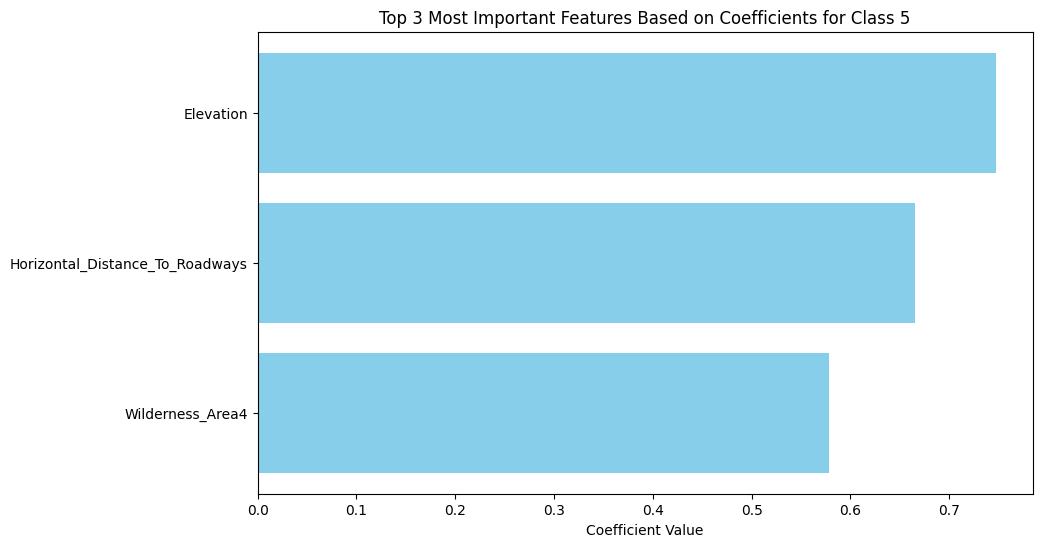

In [36]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the trained LogisticRegression model
logreg_model = joblib.load(lreg8_filename)

label = 5
# Extract coefficients
coefficients = logreg_model.coef_[label-1]  # Assuming a 1D array of coefficients for binary classification
feature_names = [f'{X.columns[i]}' for i in range(len(coefficients))]  # Assuming default 1-based indexing


# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Feature names
    'Coefficient': coefficients  # Coefficients as importance
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
top_features = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False).head(3)

# Display the top 3 features with their coefficients
print("Top 3 Most Important Features:")
print(top_features)

# Plot the top 3 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title(f'Top 3 Most Important Features Based on Coefficients for Class {label}')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()
